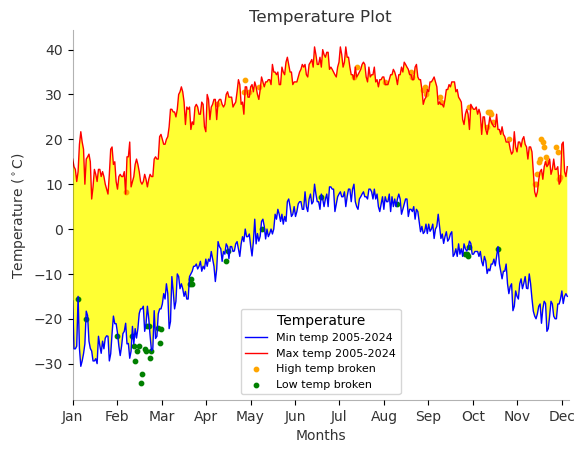

In [4]:
#import folium
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure()

# get the location information for this dataset
df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']
#station_locations_by_hash
# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
#my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
#for lat, lon in zip(lats, lons):
    #folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
#display(my_map)
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df["Data_Value"]=df["Data_Value"].apply(lambda x: x/10)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#df.head()
df = df[~((df['Month']==2)&(df['Day']==29))]
df_min=df[df["Element"]=="TMIN"]
#df_min
df_max=df[df["Element"]=="TMAX"]
#df_max

df_min=df_min.sort_values(by="Date")
#df_min=df_min.set_index("Date")
df_min=df_min.groupby(['Date']).min()
#df_max=df_max[~(df_max["Day"]==29&df_max['Month']==2)]
df_max=df_max.sort_values(by="Date")
#df_max
#df_min=df_min.set_index("Date")
df_max=df_max.groupby(['Date']).max()
#df_max

df_2015_min=df_min[df_min["Year"]==2015].groupby(["Month","Day"]).aggregate({"Data_Value":np.min})
df_2015_max=df_max[df_max["Year"]==2015].groupby(["Month","Day"]).aggregate({"Data_Value":np.max})
df_0514_min=df_min[~(df_min["Year"]==2015)].groupby(["Month","Day"]).aggregate({"Data_Value":np.min})
df_0514_max=df_max[~(df_max["Year"]==2015)].groupby(["Month","Day"]).aggregate({"Data_Value":np.max})
#df_0514_min=df_0514_min.groupby(["Day","Month"]).aggregate({"Data_Value"}:np.min)
#df_2015_min
special_min=df_2015_min[df_2015_min["Data_Value"]<df_0514_min["Data_Value"]]
special_max=df_2015_max[df_2015_max["Data_Value"]>df_0514_max["Data_Value"]]
broken_max = np.where(df_2015_max['Data_Value'] > df_0514_max['Data_Value'])[0]
broken_min = np.where(df_2015_min['Data_Value'] < df_0514_min['Data_Value'])[0]


plt.plot(df_0514_min.values,label="Min temp 2005-2024",linewidth=1,c="blue")
plt.plot(df_0514_max.values,label="Max temp 2005-2024",linewidth=1,c="red")
plt.gca().fill_between(range(len(df_0514_min)),df_0514_min['Data_Value'],df_0514_max['Data_Value'],facecolor="yellow",alpha=.8)
plt.scatter(broken_max,df_2015_max.iloc[broken_max],s=10,c="orange",label="High temp broken")
plt.scatter(broken_min,df_2015_min.iloc[broken_min],s=10,c="green",label="Low temp broken")
plt.legend(loc = 'best', title='Temperature', fontsize=8)

plt.xticks(np.linspace(0,30 + 30*11 , num = 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'Jun', r'Jul', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec'), alpha = 0.8 )
plt.yticks(alpha = 0.8 )
plt.xlim(0,365)
plt.xlabel('Months', alpha = 0.8)
plt.ylabel('Temperature ($^\circ$C)', alpha = 0.8)
plt.title('Temperature Plot', alpha = 0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['left'].set_alpha(0.3)
